In [2]:
!pip install opencv-python
!pip install tensorflow
!pip install pydot

In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
image_size = 100
images = []
labels = []
classnames = ['Superficial_Intermediate', 'Parabasal', 'Metaplastic', 'Dyskeratotic', 'Koilocytotic']
num_classes = len(classnames)
for idx, category in enumerate(classnames):
    for file_name in os.listdir(category):
        image = cv2.imread(os.path.join(category, file_name))
        if image is not None:
            image = cv2.resize(image, (image_size, image_size))
            images.append(image)
            labels.append(idx)
    

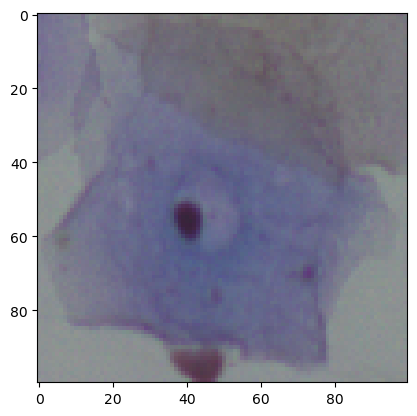

In [7]:
plt.imshow(images[3])

In [10]:
images = np.array(images, dtype="float32") / 255
labels = np.array(labels)

In [11]:
print(len(images))
print(len(labels))

4048
4048


In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=42, test_size=0.2)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(62, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 62)          │          17,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32798)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,198,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,217,731 (16.09 MB)

 Trainable params: 4,217,731 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.5075 - loss: 1.3382 - val_accuracy: 0.7500 - val_loss: 0.7428
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.7429 - loss: 0.6770 - val_accuracy: 0.7531 - val_loss: 0.6725
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7703 - loss: 0.6228 - val_accuracy: 0.8333 - val_loss: 0.4649
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8208 - loss: 0.4757 - val_accuracy: 0.8179 - val_loss: 0.6187
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8513 - loss: 0.4201 - val_accuracy: 0.8642 - val_loss: 0.4020
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8761 - loss: 0.3380 - val_accuracy: 0.8302 - val_loss: 0.5008
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8727 - loss: 0.3588 - val_accuracy: 0.8889 - val_loss: 0.3641
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9103 - loss: 0.2606 - val_accuracy: 0.6358

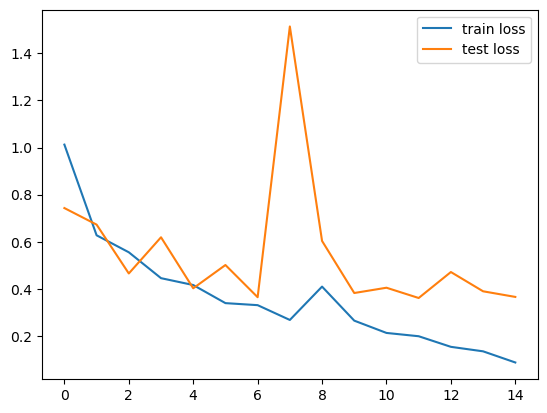

In [23]:
plt.figure()
plt.plot(history.epoch, history.history['loss'], label="train loss")
plt.plot(history.epoch, history.history['val_loss'], label="test loss")
plt.legend()
plt.show()

In [24]:
plot_model(model)        

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [52]:
test_img = cv2.imread("032_01.bmp")

test_img = cv2.resize(test_img, (100, 100))
test_img = np.expand_dims(test_img, axis=0)
test_img = np.array(test_img, dtype="float32")/255

In [64]:
features = model.predict(test_img)
features
# fig = plt.figure(figsize=(20,15))
# for i in range(1,features.shape[3]+1):

#     plt.subplot(8,8,i)
#     plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[4.92945430e-04, 2.00707950e-06, 1.06935266e-04, 3.36144515e-03,
        9.96036589e-01]], dtype=float32)

# visualise test image after each convolutional layer